# Predicción de la Longitud de Pétalo de Iris

![](08-nn.png)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [3]:
iris =datasets.load_iris()

In [4]:
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

In [5]:
session = tf.Session()

In [6]:
seed = 19
tf.set_random_seed(seed)
np.random.seed(seed)

In [7]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [8]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

### Es muy importante que en las redes neuronales se normalicen los datos de X

In [9]:
def normalize_col(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min)/(col_max-col_min)

In [10]:
x_vals_train = np.nan_to_num(normalize_col(x_vals_train))
x_vals_test = np.nan_to_num(normalize_col(x_vals_test))

In [11]:
batch_size = 50
x_data = tf.placeholder(shape = [None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)

In [12]:
hidden_layer_nodes = 5 #puede variar la cantidad ,este numero representa los "h" en la imagen
A1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes])) #recibe las 3 variables (azules en imagen) y salen las "h"
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes])) #bias, apunta a los "h"
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1])) #parte de los "h" y tiene una unica salida
b2 = tf.Variable(tf.random_normal(shape=[1]))# segundo bias que apunta a la salida

In [13]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1)) #de la capa de entrada a la capa oculta (ax+b)
final_ouput = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2)) #de la capa oculta a la de salida (ax+b)

In [14]:
loss = tf.reduce_mean(tf.square(y_target-final_ouput)) #L2

In [15]:
my_optim = tf.train.GradientDescentOptimizer(0.005)
train_step = my_optim.minimize(loss)

In [17]:
init = tf.initialize_all_variables()
session.run(init)

In [18]:
loss_vect = []
test_loss = []
for i in range(500):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vect.append(np.sqrt(temp_loss)) #cuando se usa la funcion de perdida L2 (mse), se recomienda sacarle la raiz para obtener un valor mas real
    
    temp_loss_test = session.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(temp_loss_test)) #cuando se usa la funcion de perdida L2 (mse), se recomienda sacarle la raiz para obtener un valor mas real
    
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+", Loss = "+str(temp_loss))

Paso #50, Loss = 0.338348
Paso #100, Loss = 0.189833
Paso #150, Loss = 0.190898
Paso #200, Loss = 0.152777
Paso #250, Loss = 0.166246
Paso #300, Loss = 0.118296
Paso #350, Loss = 0.136947
Paso #400, Loss = 0.134049
Paso #450, Loss = 0.13614
Paso #500, Loss = 0.205023


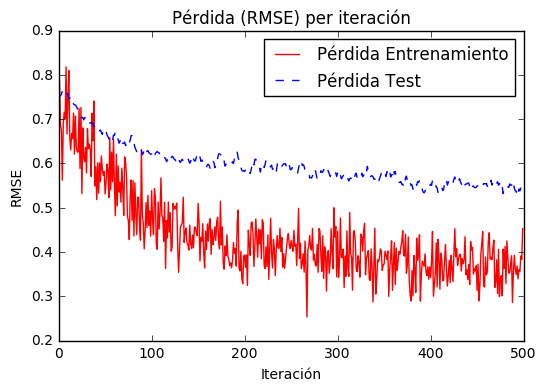

In [19]:
plt.plot(loss_vect, "r-", label="Pérdida Entrenamiento")
plt.plot(test_loss, "b--", label ="Pérdida Test")
plt.title("Pérdida (RMSE) per iteración")
plt.xlabel("Iteración")
plt.ylabel("RMSE")
plt.legend(loc ="upper right")
plt.show()

### No siempre es bueno iterar o entrenar demasiado la nn, porque caeriamos en probles de overfiting (cuando el plot de la perdida de test termina separado (Por arriba del plot) de la perdida de entrenamiento

In [70]:
print(session.run(A1))

[[ 1.22608709 -0.83392358 -1.53211451  1.12569916 -0.01609535]
 [ 0.35085046  0.85546261 -0.63662612 -0.25854507  1.60017967]
 [-0.32647198  0.08845369  0.87398624  1.30653453 -0.15702768]]


In [25]:
print(session.run(b1))

[ 0.15109812 -0.32973504 -0.58526516  2.1879828   1.42378116]


In [69]:
print(session.run(A2))

[[ 1.27434003]
 [ 0.85026217]
 [-0.91079926]
 [ 0.82937407]
 [-0.34272885]]


In [68]:
print(session.run(b2))

[-1.64615142]


In [67]:
predict=session.run(final_ouput,feed_dict={x_data: x_vals_test[:10]})

In [66]:
list(zip(predict[:,0],y_vals_test[:10]))

[(0.23091578, 0.20000000000000001),
 (2.1434045, 1.5),
 (0.11467314, 0.10000000000000001),
 (0.56308019, 0.20000000000000001),
 (0.90720117, 0.40000000000000002),
 (2.7297215, 2.2999999999999998),
 (0.35616338, 0.29999999999999999),
 (0.0, 0.20000000000000001),
 (0.1615833, 0.20000000000000001),
 (0.28756154, 0.20000000000000001)]